This notebook contains a collection of goodness-of-fit tests

In [70]:
import arviz as az
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import pandas as pd
import pymc3 as pm
from tqdm import tqdm
from sklearn.metrics import *
import theano.tensor as tt
import scipy
import scipy.stats as stats
import seaborn as sns

import rasterio as rio
from rasterio import mask
import geopandas as gpd
from shapely.geometry import shape
import xarray as xr
import rioxarray
import fiona

import optuna
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import train_test_split

tqdm.pandas()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
from models import *

balancing...
repairs: 7.6567198704603285%, non-repairs: 92.34328012953968%
processing soil hydraulic data...
acquiring housing information...
processing DEM and flow information...
fitting water model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, ppt, wtr_dist, sigma_c, mu_c, ppt_sig, ppt_mu, wtr_beta, wtr_alpha]


Sampling 4 chains for 200 tune and 500 draw iterations (800 + 2_000 draws total) took 76 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


fitting soil model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, hydr, ppt, wtr_dist, sigma_c, mu_c, hydr_sig, ppt_sig, ppt_mu, wtr_beta, wtr_alpha]


Sampling 4 chains for 200 tune and 500 draw iterations (800 + 2_000 draws total) took 118 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


fitting socio model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, hse, hydr, ppt, wtr_dist, sigma_c, mu_c, hse_sig, hydr_sig, ppt_sig, ppt_mu, wtr_beta, wtr_alpha]


Sampling 4 chains for 200 tune and 500 draw iterations (800 + 2_000 draws total) took 141 seconds.
The acceptance probability does not match the target. It is 0.9631618676341006, but should be close to 0.99. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


fitting topo model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, dem, flow, hse, hydr, ppt, wtr_dist, sigma_c, mu_c, dem_beta, dem_alpha, flow_beta, flow_alpha, hse_sig, hydr_sig, ppt_sig, ppt_mu, wtr_beta, wtr_alpha]


Sampling 4 chains for 200 tune and 500 draw iterations (800 + 2_000 draws total) took 134 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


# Goodness-of-Fit Analyses

## 1. Widely Applicable Information Criterion (WAIC)
explanation TBD

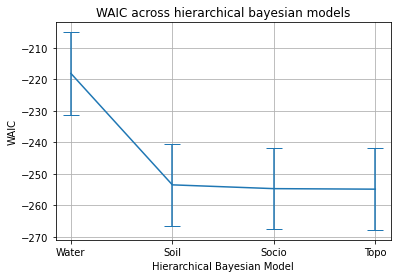

In [71]:
waic_df = pm.compare(traces_dict, ic='WAIC')
waic_df.reset_index(inplace=True)

# Plot WAIC (lower is better)
ax = waic_df['waic'].plot.line(yerr=waic_df['se'], capsize=8)
ax.set_xticks(range(len(waic_df)))
ax.set_xticklabels(['Water', 'Soil', 'Socio', 'Topo'])
ax.set_title('WAIC across hierarchical bayesian models')
ax.set_xlabel('Hierarchical Bayesian Model')
ax.set_ylabel('WAIC')
plt.grid()

## 2. Leave-one-out (LOO) 
explanation TBD

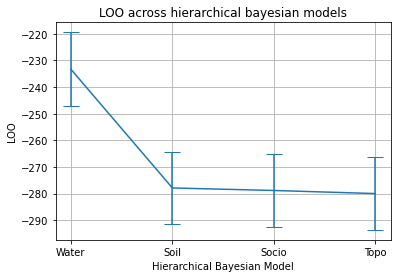

In [72]:
loo_df = pm.compare(traces_dict, ic='LOO')
loo_df.reset_index(inplace=True)

# Plot LOO (lower is better)
ax = loo_df['loo'].plot.line(yerr=loo_df['se'], capsize=8)
ax.set_xticks(range(len(waic_df)))
ax.set_xticklabels(['Water', 'Soil', 'Socio', 'Topo'])
ax.set_title('LOO across hierarchical bayesian models')
ax.set_xlabel('Hierarchical Bayesian Model')
ax.set_ylabel('LOO')
plt.grid()